# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [28]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.4.1'

In [29]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

#### Load Image Data

In [44]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


/share/pkg.7/tensorflow/2.4.1/install/lib/SCC/../python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [38]:
#raise NotImplementedError("Build your model based on an architecture of your choice "
                          #"A sample model summary is shown below")
    
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

vgg_16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='None', classes=4)
vgg_16.trainable = False

model = Sequential()
model.add(vgg_16)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu',name = 'feature_dense'))
model.add(Dense(4, activation='softmax'))

model.build(input_shape=(224, 224, 3))
model.summary()

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 25088)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 2048)              51382272  
_________________________________________________________________
dropout_15 (Dropout)         (None, 2048)              0         
_________________________________________________________________
feature_dense (Dense)        (None, 256)               524544    
_________________________________________________________________
dense_22 (Dense)             (None, 4)                

#### [5 points] Train Model

In [33]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

#raise NotImplementedError("Use the model.fit function to train your network")

history = model.fit(train_batches, epochs = NUM_EPOCHS, validation_data = valid_batches,
                              steps_per_epoch = STEP_SIZE_TRAIN,
                              validation_steps = STEP_SIZE_VALID)

22
6
Epoch 1/100
21/21 [==============================] - 8s 362ms/step - loss: 5.5289 - accuracy: 0.2996 - val_loss: 2.4441 - val_accuracy: 0.1600
Epoch 2/100
21/21 [==============================] - 7s 329ms/step - loss: 2.3689 - accuracy: 0.3497 - val_loss: 1.8834 - val_accuracy: 0.2400
Epoch 3/100
21/21 [==============================] - 7s 343ms/step - loss: 2.3245 - accuracy: 0.3207 - val_loss: 1.1007 - val_accuracy: 0.4600
Epoch 4/100
21/21 [==============================] - 8s 360ms/step - loss: 1.5368 - accuracy: 0.3385 - val_loss: 0.9883 - val_accuracy: 0.5200
Epoch 5/100
21/21 [==============================] - 7s 339ms/step - loss: 1.4119 - accuracy: 0.3853 - val_loss: 0.9554 - val_accuracy: 0.5400
Epoch 6/100
21/21 [==============================] - 7s 339ms/step - loss: 1.1478 - accuracy: 0.5267 - val_loss: 1.0422 - val_accuracy: 0.5400
Epoch 7/100
21/21 [==============================] - 7s 337ms/step - loss: 1.3162 - accuracy: 0.4329 - val_loss: 0.9350 - val_accuracy: 0

Epoch 58/100
21/21 [==============================] - 9s 400ms/step - loss: 0.7801 - accuracy: 0.6202 - val_loss: 0.6373 - val_accuracy: 0.7000
Epoch 59/100
21/21 [==============================] - 9s 414ms/step - loss: 0.7982 - accuracy: 0.6848 - val_loss: 0.6387 - val_accuracy: 0.7000
Epoch 60/100
21/21 [==============================] - 9s 409ms/step - loss: 0.7126 - accuracy: 0.7205 - val_loss: 0.7198 - val_accuracy: 0.6600
Epoch 61/100
21/21 [==============================] - 9s 404ms/step - loss: 0.8441 - accuracy: 0.5821 - val_loss: 0.7175 - val_accuracy: 0.6600
Epoch 62/100
21/21 [==============================] - 9s 408ms/step - loss: 0.6499 - accuracy: 0.6965 - val_loss: 0.6187 - val_accuracy: 0.7000
Epoch 63/100
21/21 [==============================] - 8s 397ms/step - loss: 0.8465 - accuracy: 0.6814 - val_loss: 0.5968 - val_accuracy: 0.7200
Epoch 64/100
21/21 [==============================] - 9s 403ms/step - loss: 0.7843 - accuracy: 0.5947 - val_loss: 0.7185 - val_accuracy:

#### [5 points] Plot Accuracy and Loss During Training

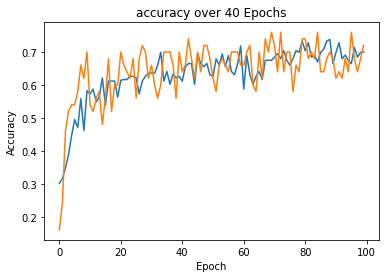

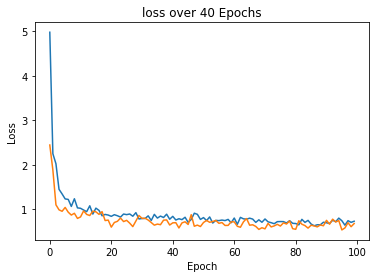

In [34]:
import matplotlib.pyplot as plt

#raise NotImplementedError("Plot the accuracy and the loss during training")

#Accuracy
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('accuracy over 40 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#Loss
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.title('loss over 40 Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Testing Model

In [35]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 2s 66ms/step - loss: 0.7948 - accuracy: 0.7500
Test loss: 0.7948353290557861
Test accuracy: 0.75


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.


/share/pkg.7/tensorflow/2.4.1/install/lib/SCC/../python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


270/270 [==============================] - 14s 52ms/step
(270, 256)
(270, 2)


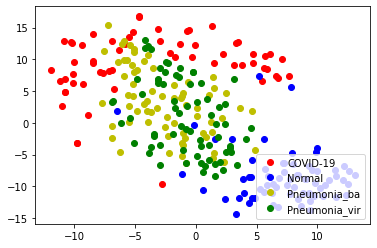

In [45]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

#raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
                          #"and plot the resulting 2D features of the four classes.")
    
pred = intermediate_layer_model.predict_generator(tsne_eval_generator,270,verbose=1)
print(pred.shape)
features = TSNE(n_components=2).fit_transform(pred)
print(features.shape)

x1,x2,x3,x4,y1,y2,y3,y4 = [],[],[],[],[],[],[],[]
cls = tsne_eval_generator.classes
for i in range(len(features)):
    if cls[i] == 0: #covid19
        x1.append(features[i, 0])
        y1.append(features[i, 1])    
    elif cls[i] == 1: #norm
        x2.append(features[i, 0])
        y2.append(features[i, 1]) 
    elif cls[i] == 2: #bac
        x3.append(features[i, 0])
        y3.append(features[i, 1])
    else: #vir
        x4.append(features[i, 0])
        y4.append(features[i, 1])

plt.figure()
plt.plot(x1, y1, 'ro', label="COVID-19")
plt.plot(x2, y2, 'bo', label="Normal")
plt.plot(x3, y3, 'yo', label="Pneumonia_ba")
plt.plot(x4, y4, 'go', label="Pneumonia_vir")
plt.legend(loc='lower right')

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->